In [1]:
####
import sys
sys.path.append('./../')

import moments
import aplpy
import matplotlib.pyplot as plt

#CAREFUL!
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.7/site-packages/aplpy/core.py:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  import mpl_toolkits.axes_grid.parasite_axes as mpltk


In [2]:
inputfile = './cube.fits'

rms_velo = [[30, 35], [35, 40]] #not case here, but can add velocity ranges either side of line
mom_velo = [40, 70] #check spectral to choose velocity range

In [3]:
# MAKE MOM maps and ERR
cube = moments.get_cube(inputfile)
rms = moments.get_rms(cube, rms_velo)
mask, _ = moments.get_threshmask(cube, rms.data, thresh=5)

rms = moments.get_rms(cube, rms_velo)
cube_masked = cube.with_mask(mask)

mom = moments.get_momentmaps(cube_masked, mom_velocity=mom_velo)
nchan = moments.get_nchan(mask)
mom0err = moments.get_mom0err(nchan, rms, cube.header['CDELT3'])

[INFO] Creating mom9 and velo_complexity - make take a while.


In [4]:
# WRITE MOM maps and ERR
rms.writeto('rms.fits', overwrite=True)
mom0err.writeto('mom0err.fits', overwrite=True)
mom['mom0'].write('mom0.fits', overwrite=True)

INFO: Auto-setting vmin to  9.687e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.089e-01 [aplpy.core]


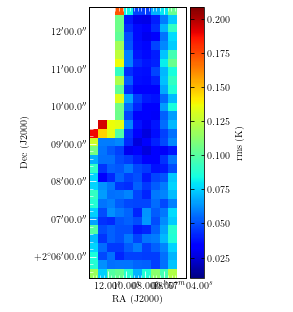

In [5]:
fig = plt.figure(figsize=(5,5))
ax = aplpy.FITSFigure(rms, figure=fig)
ax.show_colorscale()
ax.add_colorbar()
ax.colorbar.set_axis_label_text('rms (K)')
fig.savefig('rms.pdf', dpi=200, bbox_inches='tight')

INFO: Auto-setting vmin to -9.868e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.156e+01 [aplpy.core]


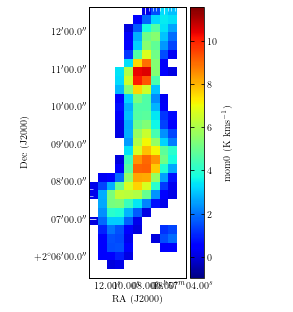

In [6]:
fig = plt.figure(figsize=(5,5))
ax = aplpy.FITSFigure(mom['mom0'].hdu, figure=fig)
ax.show_colorscale()
ax.add_colorbar()
ax.colorbar.set_axis_label_text(r'mom0 (K kms$^{-1}$)')
fig.savefig('mom0.pdf', dpi=200, bbox_inches='tight')

INFO: Auto-setting vmin to  2.877e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.212e+00 [aplpy.core]


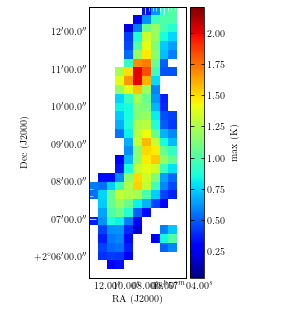

In [7]:
fig = plt.figure(figsize=(5,5))
ax = aplpy.FITSFigure(mom['max'].hdu, figure=fig)
ax.show_colorscale()
ax.add_colorbar()
ax.colorbar.set_axis_label_text(r'max (K)')
fig.savefig('max.pdf', dpi=200, bbox_inches='tight')

INFO: Auto-setting vmin to  6.729e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.052e-01 [aplpy.core]


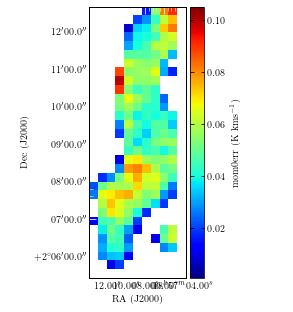

In [8]:
fig = plt.figure(figsize=(5,5))
ax = aplpy.FITSFigure(mom0err, figure=fig)
ax.show_colorscale()
ax.add_colorbar()
ax.colorbar.set_axis_label_text('mom0err (K kms$^{-1}$)')
fig.savefig('mom0err.pdf', dpi=200, bbox_inches='tight')